# Day 2 — Numpy + Pandas + Matplotlib 练习

🎯 学习目标：
- 熟悉 **Numpy** 数组与矩阵运算、广播机制
- 掌握 **Pandas** 数据处理与统计
- 学会用 **Matplotlib** 进行可视化

📌 本 Notebook 将通过小练习，串联起数值计算 → 数据处理 → 可视化的完整流程，为后续推荐系统实验做准备。


## Numpy

In [36]:
import numpy as np
import time

# 1. 数组创建
a = np.array([1,2,3])
b = np.zeros((2,3))
c = np.ones((3,3))
d = np.random.randn(3,3)

print("a:", a)
print("b:\n", b)
print("c:\n", c)
print("d:\n", d)

# 2. 矩阵运算
A = np.random.rand(3,3)
B = np.random.rand(3,3)
print("A+B=\n", A+B)
print("A@B=\n", A@B)

# 3. 广播机制
x = np.array([[1],[2],[3]])
y = np.array([10,20,30])
print("Broadcast add:\n", x+y)



a: [1 2 3]
b:
 [[0. 0. 0.]
 [0. 0. 0.]]
c:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
d:
 [[ 0.68115325  0.27967029  0.62361426]
 [ 1.65609759 -0.97117966  0.71515872]
 [ 0.44427876 -0.08753732  0.44906339]]
A+B=
 [[1.70170262 1.79959664 1.78717741]
 [1.36960679 1.00374166 1.54649943]
 [0.03981328 0.94680253 0.36233083]]
A@B=
 [[1.4393826  1.32287878 1.26899246]
 [1.04641479 1.07675984 0.969159  ]
 [0.51475698 0.35321072 0.40791428]]
Broadcast add:
 [[11 21 31]
 [12 22 32]
 [13 23 33]]


In [37]:

# 4. 向量化 vs 循环
N = 300
X = np.random.rand(N,N)
Y = np.random.rand(N,N)

# for 循环
start = time.time()
Z1 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Z1[i,j] = np.dot(X[i,:], Y[:,j])
print("Loop time:", time.time()-start)

# numpy matmul
start = time.time()
Z2 = X @ Y
print("Numpy matmul time:", time.time()-start)

# 5. 线性代数：SVD
M = np.random.rand(5,3)
U,S,Vt = np.linalg.svd(M)
print("SVD shapes:", U.shape, S.shape, Vt.shape)

Loop time: 0.1434624195098877
Numpy matmul time: 0.003424406051635742
SVD shapes: (5, 5) (3,) (3, 3)


## Pandas

### reset_index()

`reset_index()` 方法可以将 DataFrame 的索引重置为默认的整数索引。

当使用 `groupby()`, `set_index()`, 或其他操作后，分组键或设置的索引会变成 DataFrame 的索引。有时候你需要将这些索引值变回普通的列以便进一步处理。

In [38]:
import pandas as pd

df = pd.DataFrame({
    "user_id": [1,1,2,2,3,3,3],
    "movie_id": [101,102,101,103,104,105,101],
    "rating": [5,4,5,3,2,4,1]
})

print("Basic Info:")
print(df.head())

# 用户平均评分
user_mean = df.groupby("user_id")["rating"].mean().reset_index()    # reset_index() 重置索引, 如果不重置索引, 则索引为 user_id
print("User mean rating:\n", user_mean)

# 电影评分次数
movie_count = df.groupby("movie_id")["rating"].count().reset_index(name="count") # reset_index(name="count")，name的作用是给新的一列命名
print("Movie rating count:\n", movie_count)


Basic Info:
   user_id  movie_id  rating
0        1       101       5
1        1       102       4
2        2       101       5
3        2       103       3
4        3       104       2
User mean rating:
    user_id    rating
0        1  4.500000
1        2  4.000000
2        3  2.333333
Movie rating count:
    movie_id  count
0       101      3
1       102      1
2       103      1
3       104      1
4       105      1


## Matplotlib 

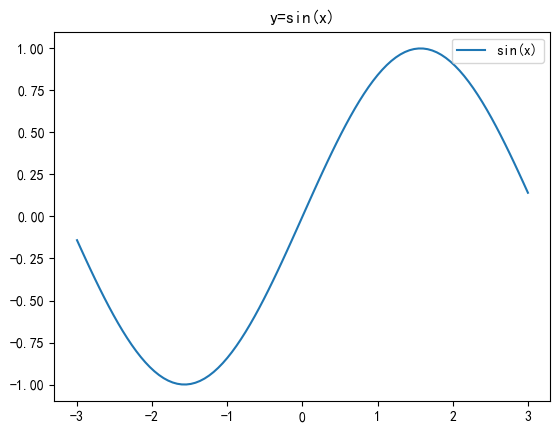

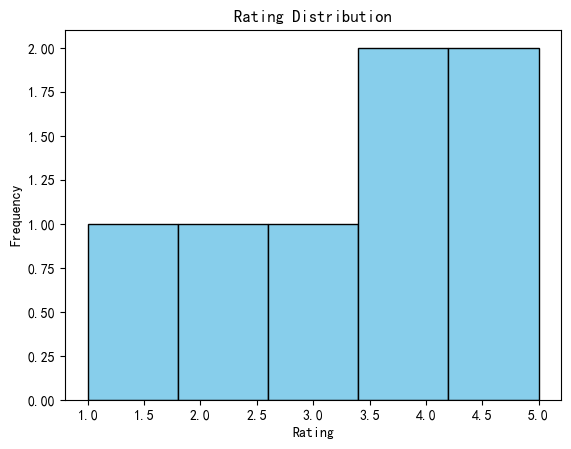

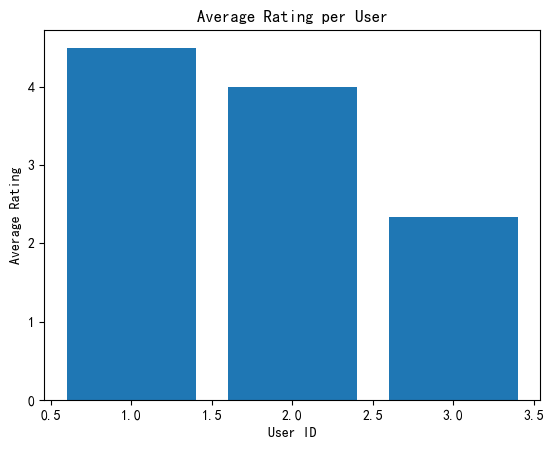

In [39]:
import matplotlib.pyplot as plt

# y=sin(x)
x = np.linspace(-3, 3, 100)
y = np.sin(x)
plt.plot(x, y, label="sin(x)")
plt.title("y=sin(x)")
plt.legend()
plt.show()

# 直方图：评分分布
plt.hist(df["rating"], bins=5, color="skyblue", edgecolor="black")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 柱状图：用户平均评分
plt.bar(user_mean["user_id"], user_mean["rating"])
plt.title("Average Rating per User")
plt.xlabel("User ID")
plt.ylabel("Average Rating")
plt.show()


📌 总结：
- Numpy 数组与矩阵乘法使用
- Pandas 数据采集与处理
- Matplotlib 数据可视化


## 进阶：MovieLens with Pandas + Matplotlib

In [40]:

# 1 加载数据
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
movies = pd.read_csv('../data/ml-latest-small/movies.csv')

In [41]:
# 2 数据预览与基本统计
print(ratings.head())
print(movies.head())
print(ratings.describe())
print(movies['genres'].value_counts().head(10))

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501

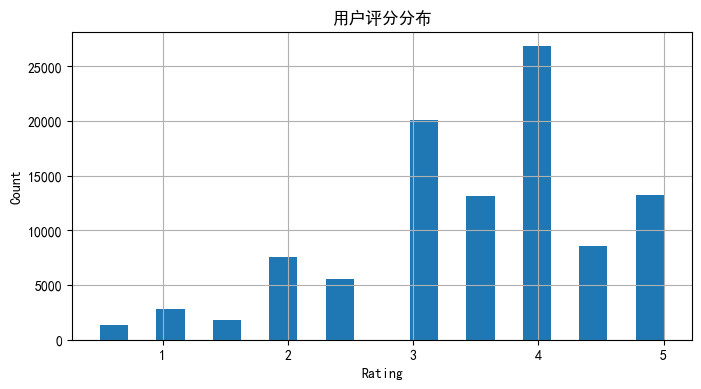

In [42]:
# 3 用户评分分布可视化
plt.figure(figsize=(8,4))
ratings['rating'].hist(bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('用户评分分布')
plt.show()

In [43]:
# 4 热门电影分析

movie_rating_count = ratings.groupby('movieId').size().sort_values(ascending=False)
top_movies = movies[movies['movieId'].isin(movie_rating_count.head(10).index)]
print(top_movies[['title','genres']])

                                          title  \
97                            Braveheart (1995)   
224   Star Wars: Episode IV - A New Hope (1977)   
257                         Pulp Fiction (1994)   
277            Shawshank Redemption, The (1994)   
314                         Forrest Gump (1994)   
418                        Jurassic Park (1993)   
461                     Schindler's List (1993)   
507           Terminator 2: Judgment Day (1991)   
510            Silence of the Lambs, The (1991)   
1939                         Matrix, The (1999)   

                                genres  
97                    Action|Drama|War  
224            Action|Adventure|Sci-Fi  
257        Comedy|Crime|Drama|Thriller  
277                        Crime|Drama  
314           Comedy|Drama|Romance|War  
418   Action|Adventure|Sci-Fi|Thriller  
461                          Drama|War  
507                      Action|Sci-Fi  
510              Crime|Horror|Thriller  
1939            Action|Sci-F

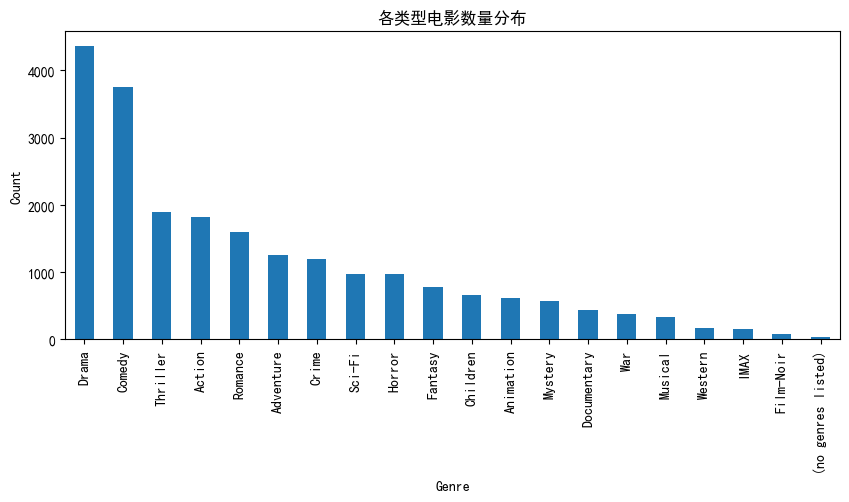

In [44]:
# 5 按照类型统计电影数量
genres_count = movies['genres'].str.split('|').explode().value_counts()
genres_count.plot(kind='bar', figsize=(10,4))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('各类型电影数量分布')
plt.show()

Ratings head:
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
Movies head:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
数据量: 100836
用户数: 610
电影数: 9724


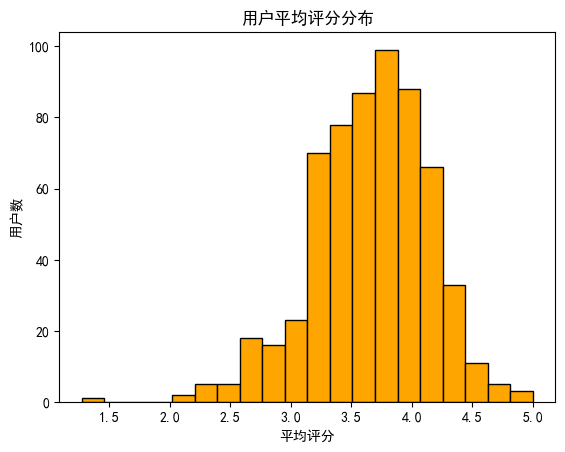

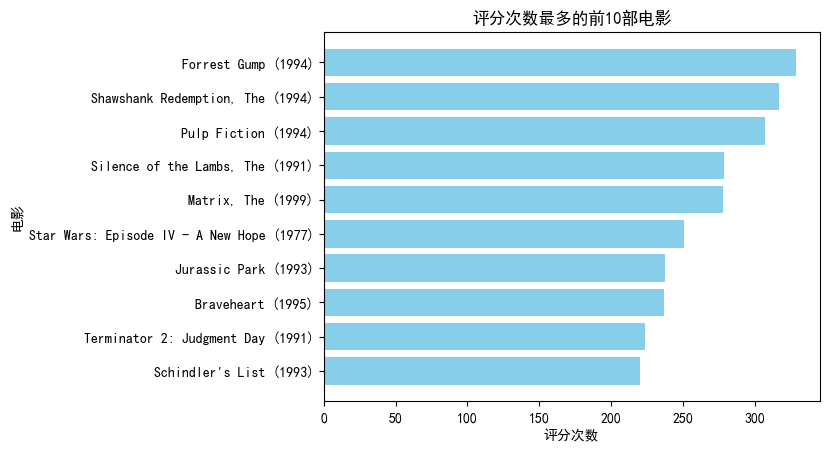

In [45]:
# 另一个版本

import pandas as pd
import matplotlib.pyplot as plt

# 1. 加载数据
ratings = pd.read_csv("../data/ml-latest-small/ratings.csv")
movies = pd.read_csv("../data/ml-latest-small/movies.csv")

print("Ratings head:\n", ratings.head())
print("Movies head:\n", movies.head())

# 2. 基本统计
print("数据量:", len(ratings))
print("用户数:", ratings["userId"].nunique())
print("电影数:", ratings["movieId"].nunique())

# 3. 用户平均评分
user_mean = ratings.groupby("userId")["rating"].mean().reset_index()

plt.hist(user_mean["rating"], bins=20, color="orange", edgecolor="black")
plt.title("用户平均评分分布")
plt.xlabel("平均评分")
plt.ylabel("用户数")
plt.show()

# 4. 电影评分次数
movie_count = ratings.groupby("movieId")["rating"].count().reset_index(name="count")
movie_count = movie_count.merge(movies, on="movieId")

top10 = movie_count.sort_values("count", ascending=False).head(10)

plt.barh(top10["title"], top10["count"], color="skyblue")
plt.title("评分次数最多的前10部电影")
plt.xlabel("评分次数")
plt.ylabel("电影")
plt.gca().invert_yaxis()  # 让第一名在最上面
plt.show()
